In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

In [2]:
sigma_a = 0.1
sharpe = 0.3
mu_a = sigma_a*sharpe

days_in_year = 252
years = 10
trials = 10000

# Simulate Daily Returns

Let's simulate daily returns and compound them a full year. 

At the end of the year, we will calculate the continously compounded return and the daily compounded return and compare it to the return we simulated.

$$S_t = S_0\exp\{{(\mu-\frac{\sigma^2}{2})t + B_t\sigma}\}$$
$$B_t \sim \ N(0,t)$$

$$\log{\frac{S_t}{S_0}} \sim \ N((\mu-\frac{\sigma^2}{2})t,\sigma^2 t)$$

$\sigma_d$ is the daily volatility and $\sigma_a$ is the annual volatility

$t_d$ is the number of days in a year

$\mu_a$ is the annual return and $\mu_a$ is the annual return

$$\sigma_d^2 t_d = \sigma_a^2 \rightarrow \sigma_d = \frac{\sigma_a}{\sqrt{t_d}}$$

$$(\mu_d - \frac{\sigma_d^2}{2}) t_d = \mu_a - \frac{\sigma_a^2}{2} \rightarrow \mu_d = \frac{\mu_a - \frac{\sigma_a^2}{2}}{t_d} + \frac{\sigma_d^2}{2}$$

In [3]:
sigma_d = sigma_a/np.sqrt(days_in_year)
daily_ito_correction_term = (sigma_d**2)/2
mu_d = (mu_a - (sigma_a**2)/2)/days_in_year + daily_ito_correction_term

In [4]:
seed=0
np.random.seed(seed)
rets = np.random.normal(
    loc=(mu_d - np.power(sigma_d,2)/2),
    scale=sigma_d,
    size=days_in_year*trials
).reshape(
    days_in_year,
    trials
)

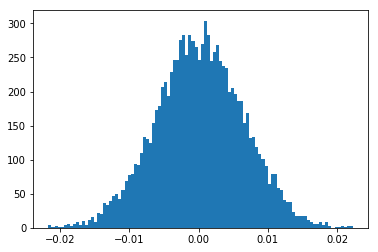

In [5]:
plt.hist(rets[:100,:100].reshape(100*100),bins=100)
plt.show()

In [6]:
S_0 = 100
S_t = S_0*np.cumprod(np.exp(rets),axis=0)

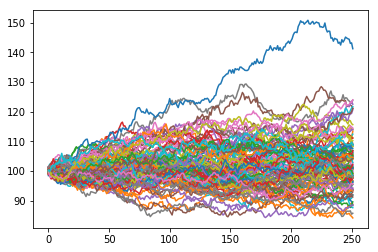

In [7]:
plt.plot(S_t[:,:100])
plt.show()

$$S_t = S_0\exp\{{(\mu-\frac{\sigma^2}{2})t + B_t\sigma}\}$$

$$ \frac{\log{\frac{S_t}{S_0}}}{t} = (\mu-\frac{\sigma^2}{2}) + \frac{B_t\sigma}{t}$$

$$E[B_t] = 0$$

$$ E[\frac{\log{\frac{S_t}{S_0}}}{t}] = \mu-\frac{\sigma^2}{2}$$


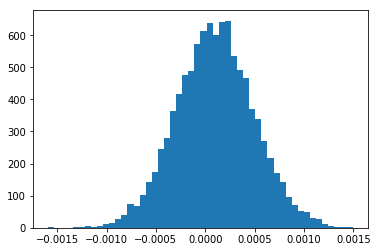

In [8]:
compounded_returns = np.log(S_t[-1,:]/S_0)/days_in_year
plt.hist(compounded_returns,bins=50)
plt.show()

Expected Compounded Return after accounting for the Ito's Correction term

https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma

In [9]:
theoretical_daily_return = mu_d - (sigma_d**2)/2
theoretical_daily_return

9.920634920634919e-05

## Average Compounded Return

In [10]:
realized_daily_return = np.mean(compounded_returns)
realized_daily_return

0.0001009862059548746

## Error

In [11]:
error = realized_daily_return - theoretical_daily_return
error

1.7798567485254068e-06

## T Value

In [12]:
tvalue = error/(np.std(compounded_returns,ddof=1)/np.sqrt(trials))
tvalue

0.45453849130022744

## P Value

In [13]:
stats.norm.cdf(-np.abs(tvalue))*2

0.6494412942987471

## Daily Compounded Returns

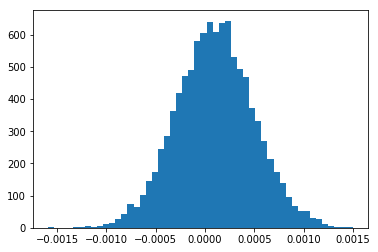

In [201]:
compounded_returns = np.power(S_t[-1,:]/S_0,1/days_in_year) - 1
plt.hist(compounded_returns,bins=50)
plt.show()

Expected Compounded Return after accounting for the Ito's Correction term

https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma

In [14]:
theoretical_daily_return = mu_d - (sigma_d**2)/2
theoretical_daily_return

9.920634920634919e-05

### Average Compounded Return

In [15]:
realized_daily_return = np.mean(compounded_returns)
realized_daily_return

0.0001009862059548746

### Error

In [16]:
error = realized_daily_return - theoretical_daily_return
error

1.7798567485254068e-06

### T Values

In [17]:
tvalue = error/(np.std(compounded_returns,ddof=1)/np.sqrt(trials))
tvalue

0.45453849130022744

### P Value

In [18]:
stats.norm.cdf(-np.abs(tvalue))*2

0.6494412942987471

# Annual Returns

Let's repeat the same experiment over multiple years.

$$S_t = S_0\exp\{{(\mu-\frac{\sigma^2}{2})t + B_t\sigma}\}$$
$$B_t \sim \ N(0,t)$$

$$\log{\frac{S_t}{S_0}} \sim \ N((\mu-\frac{\sigma^2}{2})t,\sigma^2 t)$$

$\sigma_{dec}$ is the decade volatility 

$t_{dec}$ is the number of years in a decade

$\mu_{dec}$ is the decade return

$$\sigma_a^2 t_{dec} = \sigma_{dec}^2 \rightarrow \sigma_{dec} = \sigma_a * \sqrt{t_{dec}}$$

$$(\mu_a - \frac{\sigma_a^2}{2}) t_{dec} = \mu_{dec} - \frac{\sigma_{dec}^2}{2} \rightarrow \mu_{dec} = (\mu_a - \frac{\sigma_a^2}{2}) t_{dec} + \frac{\sigma_{dec}^2}{2}$$

In [36]:
sigma_dec = sigma_a*np.sqrt(years)
yearly_ito_correction_term = (sigma_a**2)/2
decade_ito_correction_term = (sigma_dec**2)/2
mu_dec = (mu_a - yearly_ito_correction_term)*years + decade_ito_correction_term

In [37]:
seed=0
np.random.seed(seed)
rets = np.random.normal(
    loc=(mu_d - np.power(sigma_d,2)/2),
    scale=sigma_d,
    size=days_in_year*years*trials
).reshape(
    days_in_year*years,
    trials
)

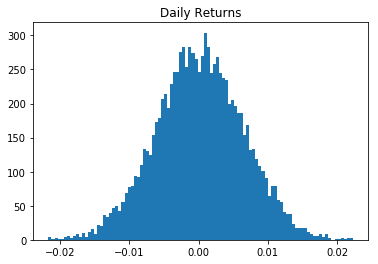

In [41]:
plt.hist(rets[:100,:100].reshape(100*100),bins=100)
plt.title('Daily Returns')
plt.show()

In [42]:
S_0 = 100
S_t = S_0*np.cumprod(np.exp(rets),axis=0)

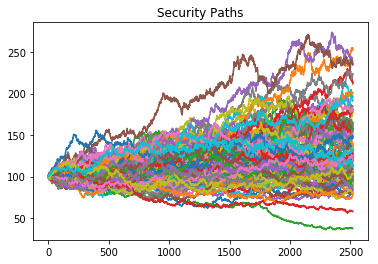

In [44]:
plt.plot(S_t[:,:100])
plt.title('Security Paths')
plt.show()

$$S_t = S_0\exp\{{(\mu-\frac{\sigma^2}{2})t + B_t\sigma}\}$$

$$ \frac{\log{\frac{S_t}{S_0}}}{t} = (\mu-\frac{\sigma^2}{2}) + \frac{B_t\sigma}{t}$$

$$E[B_t] = 0$$

$$ E[\frac{\log{\frac{S_t}{S_0}}}{t}] = \mu-\frac{\sigma^2}{2}$$


## Continously Compounded Returns

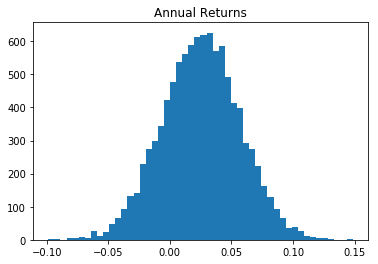

In [46]:
compounded_returns = np.log(S_t[-1,:]/S_0)/(years)
plt.hist(compounded_returns,bins=50)
plt.title('Annual Returns')
plt.show()

In [47]:
theoretical_annual_return = mu_a - (sigma_a**2)/2
theoretical_annual_return

0.024999999999999998

### Average Compounded Return

In [48]:
realized_annual_return = np.mean(compounded_returns)
realized_annual_return

0.02520520676133385

### Error

In [49]:
error = realized_annual_return - theoretical_annual_return
error

0.00020520676133385304

### T Values

In [50]:
tvalue = error/(np.std(compounded_returns,ddof=1)/np.sqrt(trials))
tvalue

0.6484969728602165

### P Value

In [51]:
stats.norm.cdf(-np.abs(tvalue))*2

0.5166635680998375

## Annually Compounded Returns

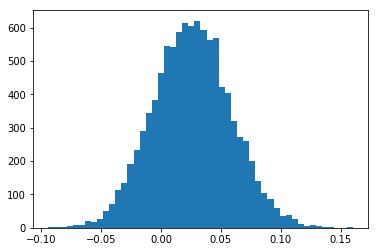

In [61]:
compounded_returns = np.power(S_t[-1,:]/S_0,1/years) - 1
plt.hist(compounded_returns,bins=50)
plt.show()

### Average Compounded Return

In [62]:
realized_annual_return = np.mean(compounded_returns)
realized_annual_return

0.026038874501224513

### Error

In [63]:
error = realized_annual_return - theoretical_annual_return
error

0.0010388745012245154

### T Values

In [65]:
tvalue = error/(np.std(compounded_returns,ddof=1)/np.sqrt(trials))
tvalue

3.2006229083682953

### P Value

In [66]:
stats.norm.cdf(-np.abs(tvalue))*2

0.0013713086972718014

The error grew dramatically if we only compound annually. 

# Levered Returns

Now let's see if our levered annual return is 3x our annual return.

$$S_{t,levered} = S_0\exp\{3*({(\mu-\frac{\sigma^2}{2})t + B_t\sigma})\}$$

$$\log{\frac{S_{t,levered}}{S_0}} \sim \ N(3*(\mu-\frac{\sigma^2}{2})t,9*\sigma^2 t)$$



The expected total return of the levered daily returns are

$$E[\log{\frac{S_{t,levered}}{S_0}}] = 3*(\mu_d-\frac{\sigma_d^2}{2})t_d$$

$$E[\frac{\log{\frac{S_{t,levered}}{S_0}}}{t_d}] = 3*\mu_d-3*\frac{\sigma_d^2}{2}$$

In [67]:
S_0 = 100
S_t_levered = S_0*np.cumprod(np.exp(rets*3),axis=0)

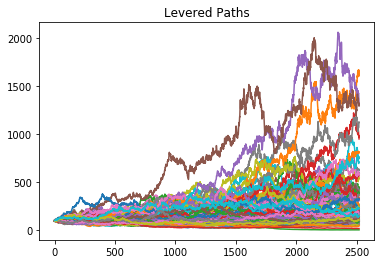

In [69]:
plt.plot(S_t_levered[:,:100])
plt.title('Levered Paths')
plt.show()

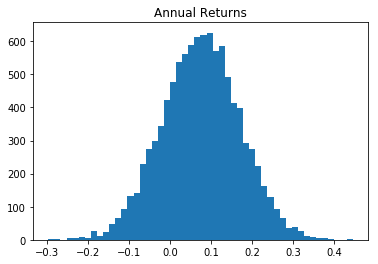

In [70]:
compounded_returns_levered = np.log(S_t_levered[-1,:]/S_0)/years
plt.hist(compounded_returns_levered,bins=50)
plt.title('Annual Returns')
plt.show()

In [71]:
theoretical_annual_return*3

0.075

### Average Compounded Return

In [72]:
realized_annual_return_levered = np.mean(compounded_returns_levered)
realized_annual_return_levered

0.07561562028400155

### Error

In [73]:
error = realized_annual_return_levered - theoretical_annual_return*3
error

0.0006156202840015557

### T Values

In [74]:
tvalue = (error)/(np.std(compounded_returns_levered,ddof=1)/np.sqrt(trials))
tvalue

0.6484969728602128

### P Value

In [75]:
stats.norm.cdf(tvalue)*2

1.48333643190016

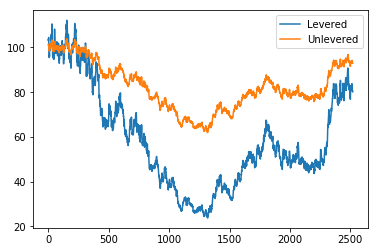

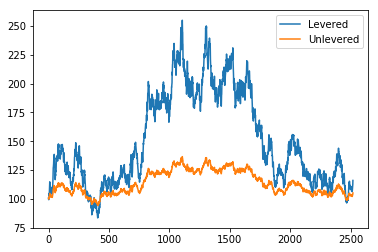

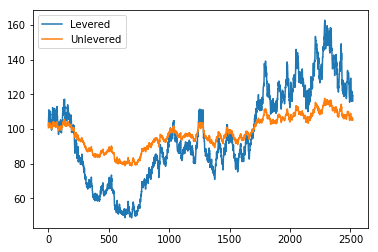

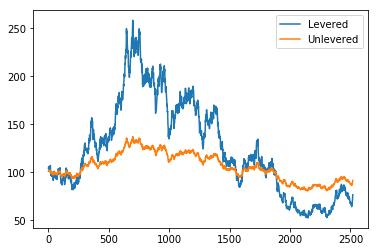

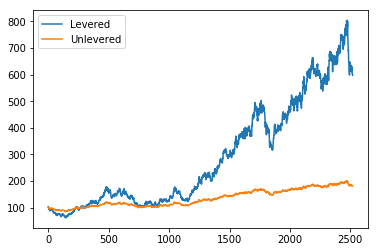

In [76]:
for i in range(5):
    plt.plot(S_t_levered[:,i],label='Levered')
    plt.plot(S_t[:,i],label='Unlevered')
    plt.legend()
    plt.show()

As you can see above the levered instruments can have wildly varying ending prices due to compounding but the average total return is still 3x the return of the unlevered portfolio.

Another way you can think about this is if you equally invested $\frac{1}{trails}$ into each security.

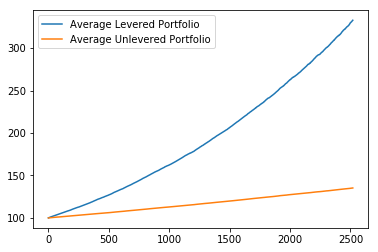

In [77]:
avg_levered_s = S_t_levered@np.ones((trials,1))/trials
avg_unlevered_s = S_t@np.ones((trials,1))/trials
plt.plot(avg_levered_s,label='Average Levered Portfolio')
plt.plot(avg_unlevered_s,label='Average Unlevered Portfolio')
plt.legend()
plt.show()

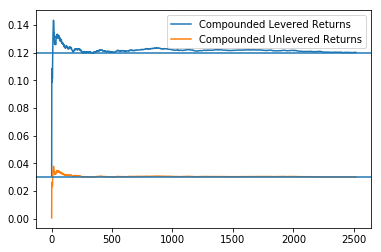

In [82]:
plt.plot(np.log(avg_levered_s/S_0)[:,0]*days_in_year/np.arange(1,1+years*days_in_year), label='Compounded Levered Returns')
plt.plot(np.log(avg_unlevered_s/S_0)[:,0]*days_in_year/np.arange(1,1+years*days_in_year), label='Compounded Unlevered Returns')

plt.axhline(mu_a)
plt.axhline(4*mu_a)
plt.legend()
plt.show()

In [84]:
mu_a

0.03

In [86]:
mu_a - (sigma_a**2)/2

0.024999999999999998

You can see above that the annual compounded return over time asymptotically approaches $\mu_a$ and not $\mu_a - \frac{\sigma^2}{2}$. This is not what I expected.

Even weirder the 3x levered portfolio asymptotically approached $4*\mu_a$ and not $3*(\mu_a - \frac{\sigma^2}{2})$